In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt('PEA.csv', delimiter=',')

In [36]:
energy = data[:,0]
intensity = data[:,1]
# intensity = intensity/np.max(intensity)

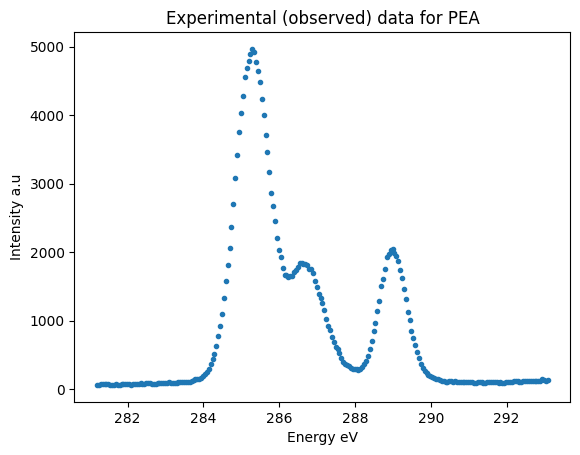

In [37]:
fig = plt.figure()
plt.plot(energy,intensity,'.')
plt.xlabel('Energy eV')
plt.ylabel('Intensity a.u')
plt.title('Experimental (observed) data for PEA')
plt.show()


### 2.1. RMS error between two datasets

Given two arrays of equal length, the **root-mean-square (RMS) error** is:

$\mathrm{RMS}(y, \hat{y}) = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 }$

The code below defines a function for calculating the RMS between two datasets (y and yhat).


In [18]:
def rms_error(y, yhat):
    """Compute the root-mean-square error between y and yhat.

    Parameters
    ----------
    y : array_like
        Ground-truth or observed data.
    yhat : array_like
        Model predictions at the same x-values.

    Returns
    -------
    float
        RMS error.
    """
    y = np.asarray(y)
    yhat = np.asarray(yhat)
    if y.shape != yhat.shape:
        raise ValueError("y and yhat must have the same shape")
    rmse_value = float(np.sqrt(np.mean((y - yhat) ** 2)))
    return(rmse_value)


### Residuals

One other method for assessing goodness of fit is to visually inspect the residuals of the fit. The residuals are the difference between the observed and fitted data, and you can obtain them by simply subtracting the fitted data from the original data. The code below calculates the residuals for each of the two fits, and then plots the residuals below each fit.

In [19]:
# #Calculating the residuals for each fit
# residuals_gaussian = y_obs - gaussian(x, best_gaussian[0],best_gaussian[1],best_gaussian[2])
# residuals_lorentzian = y_obs - lorentzian(x, best_lorentzian[0],best_lorentzian[1],best_lorentzian[2])

# fig, axs = plt.subplots(2, 2)

# # Top plot: data and fit
# axs[0,0].plot(x, y_obs, '.', ms=3, label='Observed')
# axs[0,0].plot(x, gaussian(x, best_gaussian[0],best_gaussian[1],best_gaussian[2]), label=f'Gaussian fit (RMS={best_rms_gaussian:.4f})')
# axs[0,0].set_ylabel("Intensity")
# axs[0,0].set_title("Gaussian fit (minimize RMS)")

# # Bottom plot: residuals
# axs[1,0].axhline(0, color='k', lw=1)
# axs[1,0].plot(x, residuals_gaussian, '.', ms=3, color="red")
# axs[1,0].set_xlabel("x")
# axs[1,0].set_ylabel("Residuals")

# # Top plot: data and fit
# axs[0,1].plot(x, y_obs, '.', ms=3, label='Observed')
# axs[0,1].plot(x, lorentzian(x, best_lorentzian[0],best_lorentzian[1],best_lorentzian[2]), label=f'Gaussian fit (RMS={best_rms_gaussian:.4f})')
# axs[0,1].set_ylabel("Intensity")
# axs[0,1].set_title("Lorentzian fit (minimize RMS)")

# # Bottom plot: residuals
# axs[1,1].axhline(0, color='k', lw=1)
# axs[1,1].plot(x, residuals_lorentzian, '.', ms=3, color="red")
# axs[1,1].set_xlabel("x")
# axs[1,1].set_ylabel("Residuals")

# plt.tight_layout()
# plt.show()

## 3. Voigt profiles
The Gaussian and Lorentzian lineshapes used so far fit to many different types of data. However, there are many types of spectroscopy in which lineshapes become a little more complicated.


In X-ray photoelectron spectroscopy (XPS), and many other types of spectroscopy, peaks take a shape known as a Voigt profile, which is a convolution of a Gaussian and Lorentzian function. This shape often arises due to combinations of Gaussian and Lorentzian peak broadening processes.

Thankfully, rather than having to code a convolution of two functions, scipy provides us with a function to generate a Voigt profile. The `voigt_profile()` function takes 3 arguments: the array of x values, the sigma of the Gaussian distribution and the gamma of the Lorentzian distribution.

In [20]:
from scipy.special import voigt_profile

In [22]:
#Input your answer to 3.1 here.
def shifted_voigt(x, area, centre, sigma, gamma):
    y_voigt_shifted = area*voigt_profile(x-centre, sigma, gamma)
    return y_voigt_shifted

In [23]:
#Input your answer to 4.1 here.
def multi_voigt(x,*par):
    n_peaks = len(par)/4
    y_multi_voigt = np.zeros_like(x)

    for i in range(int(n_peaks)):
        #In the line below, the index of params is 4*i as there are 4 parameters per peak.
        y_multi_voigt += shifted_voigt(x, par[4*i],par[4*i+1], par[4*i+2], par[4*i+3])
        print(par[4*i])
    return y_multi_voigt

In [24]:
from scipy.optimize import curve_fit

5000.0
5000.0
2000.0
2000.0
5000.000074505806
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.000074505806
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0000298023224
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0000298023224
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
5000.0
5000.0
2000.0
2000.0
1684064.3371626372
-1725467.0042828138
48915.65034097959
3640.317089733261
157867.61394246592
-185440.98960380306
35172.20247105132
3505.9727679579732
-2929.6627925763323
-4045.233711721665
15607.165916635318
2674.5892090658886
4003.3288877808623
4216.046154694229
1545.932543383261
1874.9837965851343
4889.111092003723
4913.186728598658
1934.7554743508374
2020.1222770038025
4889.111164857155
4913.186728598658
1934.7554743508374
2020.1222770038025
4889.111092003723
4913.18672

2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833653750718
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.265584016841
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562439090713
5415.956767326029
15547.833422069947
2375.2655486226263
1822.3562167538475
5415.956767326029
15547.833422069947
2375.2655486226263
1822.35

5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.483168247919
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.31482819455
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6566304208754
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624416057247
5417.48308752113
66725.3138339099
2375.6565950208337
1824.2624

1827.8788039908995
5421.278691648342
45920.32369972552
2376.760042527487
1827.8788039908995
5421.278691648342
45920.32369972552
2376.760007111003
1827.8788039908995
5421.278691648342
45920.32369972552
2376.760007111003
1827.8788039908995
5421.278691648342
45920.32369972552
2376.760007111003
1827.8788039908995
5421.278691648342
45920.32369972552
2376.760007111003
1827.8788312284162
5421.278691648342
45920.32369972552
2376.760007111003
1827.8788039908995
5421.278691648342
45920.32369972552
2376.760007111003
1827.8788039908995
5421.278691648342
45920.32369972552
2376.760007111003
1827.8788039908995
5421.485333766526
43403.4279122587
2376.763455013954
1828.303525374947
5421.485414552953
43403.4279122587
2376.763455013954
1828.303525374947
5421.485333766526
43403.4279122587
2376.763455013954
1828.303525374947
5421.485333766526
43403.4279122587
2376.763455013954
1828.303525374947
5421.485333766526
43403.4279122587
2376.763455013954
1828.303525374947
5421.485333766526
43403.428559020176
2376.

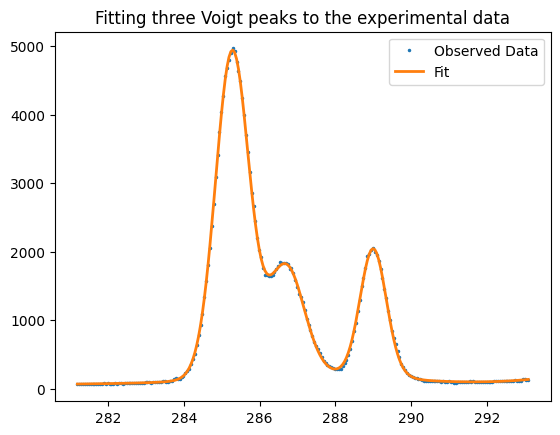

In [39]:
# Initial guess for [A1, x01, sigma1, gamma1, A2, x02, sigma2, gamma2]
p0 = [5000, 285, 0.5, 0.5, 5000, 285.4, 0.5, 0.5, 2000, 286.5, 0.5, 0.5, 2000, 289, 0.5, 0.5]

#Calculate the optimal parameters and the covariance of parameters.
popt, pcov = curve_fit(multi_voigt, energy, intensity, p0=p0)

print("Best-fit parameters:", popt)

#Generate a profile based on the optimal parameters in popt
intensity_fit = multi_voigt(energy, *popt)

plt.plot(energy, intensity, '.', ms=3, label="Observed Data") #Plot the original data
plt.plot(energy, intensity_fit, '-', lw=2, label="Fit") #Plot the fitted function
plt.legend(); plt.title("Fitting three Voigt peaks to the experimental data")
plt.show()

The fit above appears perfect, and we might expect that considering the fitted values match our initial values.

We can assess the goodness of fit in a number of ways.

Firstly, we can examine the covariance of parameters from `curve_fit()`.

In [40]:
print(pcov)

[[ 1.34503532e+03  1.16080112e-02 -8.47947067e-02  2.03770879e-01
  -9.26512556e+03  2.21010696e+01 -7.43378032e+00  1.04158141e+01
  -8.43642237e+02  5.58637752e-02  1.96685801e-01 -3.97369747e-01
   9.20673521e+02 -1.17526085e-02 -1.39238873e-01  3.29211453e-01]
 [ 1.16080112e-02  8.86387416e-07 -3.27449096e-09  9.61192619e-07
  -5.03129317e-02 -4.75856648e-05  9.79104029e-06 -1.05885861e-05
  -1.48885000e-02  1.76186264e-06 -2.12264851e-07 -3.43730641e-06
   5.03183303e-03 -1.07859750e-07 -1.13872064e-06  2.32653829e-06]
 [-8.47947067e-02 -3.27449096e-09  9.20614527e-06 -1.76621837e-05
   1.06494461e+00 -7.73463138e-04  2.34341676e-04 -2.41392400e-04
   2.46404204e-02 -5.46886740e-07 -9.39735867e-06  1.27595692e-05
  -3.62827346e-02  3.70793526e-07  4.71740515e-06 -1.18835669e-05]
 [ 2.03770879e-01  9.61192619e-07 -1.76621837e-05  3.76916804e-05
  -2.28924492e+00  2.23072656e-03 -7.03279014e-04  8.27254301e-04
  -7.36440658e-02  5.08075126e-06  1.92071018e-05 -3.23949924e-05
   9.87

At first glance, the array of numbers in pcov are not that easy to interpret. As the pcov array contains covariances, the diagaonals should be the variance on each of the parameters (don't worry about this, but it's true!). The standard deviation on each parameter can be calculated by taking the square root of the diagonal elements.

In [41]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[3.66747232e+01 9.41481501e-04 3.03416303e-03 6.13935505e-03
 1.26922373e+03 3.01038600e+00 1.01833908e+00 1.60993831e+00
 4.78623165e+01 3.07486839e-03 1.28700516e-02 2.41966177e-02
 5.25425182e+01 1.53389316e-03 9.09580011e-03 1.96268028e-02]


The standard deviations on each parameter are very small relative to the parameter values, as we'd expect!

We could also calculate the RMS error between the initial data and the fitted function to estimate goodness of fit, by using the RMS error function we defined previously.

In [42]:
print(rms_error(intensity, intensity_fit))

17.82599956533985


The RMS error here is vanishingly small, as we'd expect here.

<div class="alert alert-success">
<b>Task 4.2: Attempt to fit 3 peaks to the y data obtained above for two Voigt peaks, with appropriate initial guesses for all parameters. Plot the residual and calculate both the RMS error and the standard deviations on all parameters.<br></b>
How do the errors compare to the correct fitting of two peaks?
</div>


1.0
2.0
1.0
1.0000000149011612
2.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
2.0000000298023224
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0000000149011612
1.0
2.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.5001039780584011
1.9135632946930528
0.43903626954326225
1.033460561769722
1.9552662369011404
0.9835327024616898
1.0334605771694843
1.9552662369011404
0.9835327024616898
1.033460561769722
1.9552662369011404
0.9835327024616898
1.033460561769722
1.9552662369011404
0.9835327024616898
1.033460561769722
1.9552662369011404
0.9835327024616898
1.033460561769722
1.9552662660368778
0.9835327024616898
1.033460561769722
1.9552662369011404
0.9835327024616898
1.033460561769722
1.9552662369011404
0.9835327024616898
1.033460561769722
1.9552662369011404
0.9835327024616898
1.033460561769722
1.9552662369011404
0.9835327171174691
1.033460561769722
1.9552662369011404
0.9835327024616898
1.033460561769722
1.9552662369011404
0.9835327024616898
1.033460561769722
1.9552662369011404
0.9835327024616898
1.1076663946

0.6558230399137507
1.2236850505460253
1.922726045627533
0.6558230399137507
1.238002122777857
1.9224657578536064
0.6328745087738795
1.2380021412255262
1.9224657578536064
0.6328745087738795
1.238002122777857
1.9224657578536064
0.6328745087738795
1.238002122777857
1.9224657578536064
0.6328745087738795
1.238002122777857
1.9224657578536064
0.6328745087738795
1.238002122777857
1.9224657865005785
0.6328745087738795
1.238002122777857
1.9224657578536064
0.6328745087738795
1.238002122777857
1.9224657578536064
0.6328745087738795
1.238002122777857
1.9224657578536064
0.6328745087738795
1.238002122777857
1.9224657578536064
0.6328745182044446
1.238002122777857
1.9224657578536064
0.6328745087738795
1.238002122777857
1.9224657578536064
0.6328745087738795
1.238002122777857
1.9224657578536064
0.6328745087738795
1.2533013977589367
1.922053583152893
0.6088893857581725
1.2533014164345828
1.922053583152893
0.6088893857581725
1.2533013977589367
1.922053583152893
0.6088893857581725
1.2533013977589367
1.9220535

1.9107462300748752
0.43606367847218575
1.3800294198191978
1.910746201602538
0.43606367847218575
1.3800294198191978
1.910746201602538
0.43606367847218575
1.3800294198191978
1.910746201602538
0.43606367847218575
1.3800294198191978
1.910746201602538
0.4360636849700409
1.3800294198191978
1.910746201602538
0.43606367847218575
1.3800294198191978
1.910746201602538
0.43606367847218575
1.3800294198191978
1.910746201602538
0.43606367847218575
1.3832342515731932
1.9103333633075863
0.43196199136366675
1.3832342721849897
1.9103333633075863
0.43196199136366675
1.3832342515731932
1.9103333633075863
0.43196199136366675
1.3832342515731932
1.9103333633075863
0.43196199136366675
1.3832342515731932
1.9103333633075863
0.43196199136366675
1.3832342515731932
1.9103333917737717
0.43196199136366675
1.3832342515731932
1.9103333633075863
0.43196199136366675
1.3832342515731932
1.9103333633075863
0.43196199136366675
1.3832342515731932
1.9103333633075863
0.43196199136366675
1.3832342515731932
1.9103333633075863
0.4

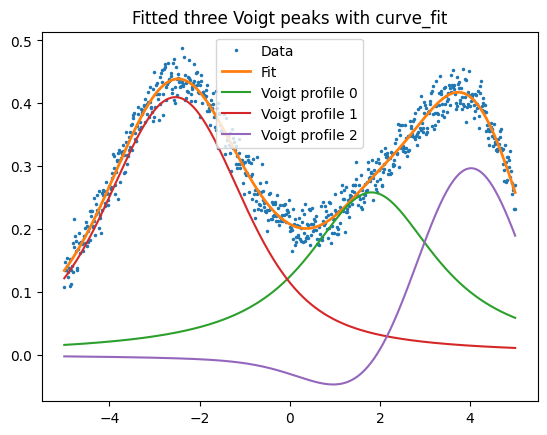

In [58]:
#Input your answer to 4.2 here.
# Initial guess for [A1, x01, sigma1, gamma1, A2, x02, sigma2, gamma2]
# p0 = [1.0, -1.5, 1.0, 0.5, 1.0, 2.5, 0.8, 0.5, 0.7, 2.5, 0.6, 0.6]
p0 = [1.0, 2.5, 1.0, 1.0, 2.0, -2.5, 1.0, 1.0, 1.0, 4.1, 0.5, 1.0]

#Calculate the optimal parameters and the covariance of parameters.
popt, pcov = curve_fit(multi_voigt, x, y, p0=p0)

print("Best-fit parameters:", popt)

#Generate a profile based on the optimal parameters in popt
y_fit_three_peaks = multi_voigt(x, *popt)

plt.plot(x, y, '.', ms=3, label="Data") #Plot the original data
plt.plot(x, y_fit_three_peaks, '-', lw=2, label="Fit") #Plot the fitted function
for i in range(int(len(popt)/4)): 
    # plt.plot(x, shifted_voigt(x, p0[4*i],p0[4*i+1], p0[4*i+2], p0[4*i+3]), label=f'Voigt profile {i}')
    plt.plot(x, shifted_voigt(x, popt[4*i], popt[4*i+1], popt[4*i+2], popt[4*i+3]), label=f'Voigt profile {i}')
plt.legend(); plt.title("Fitted three Voigt peaks with curve_fit")
plt.show()

In [49]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[3.05951697e-15 4.98240566e-16 3.29605744e-15 5.14658280e-15
 5.95312663e-09 5.14553493e-09 4.67816599e-09 8.68973019e-09
 5.95312519e-09 9.34621845e-09 8.49730590e-09 1.57838416e-08]


In [59]:
print(rms_error(y, y_fit_three_peaks))

0.019415406237196516
